<a href="https://colab.research.google.com/github/pouuh/prospect_bayes/blob/master/train_model_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pdb

In [ ]:
import os
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
    print('ERROR: Not connected to a TPU runtime')
else:
    tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
    print ('TPU address is', tpu_address)

ERROR: Not connected to a TPU runtime


In [ ]:
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# train_x=np.load('/content/drive/MyDrive/earthengine/train_x.npy')
# train_y=np.load('/content/drive/MyDrive/earthengine/train_y.npy')

train_x=np.load('/content/drive/MyDrive/earthengine2/train_x3.npy')
train_y=np.load('/content/drive/MyDrive/earthengine2/train_y3.npy')

print(train_x.shape)
print(train_y.shape)

(16298, 32, 32, 9)
(16298, 1)


In [ ]:
#check  and drop nan values
idxs=np.where(np.isnan(np.sum(train_x,axis=(1,2,3))) == True)
print(idxs)
train_x=np.delete(train_x,idxs,0)
train_y=np.delete(train_y,idxs,0)

print('Final train shape')
print(train_x.shape)
print(train_y.shape)

(array([    3,     5,    11, ..., 16295, 16296, 16297]),)
Final train shape
(13210, 32, 32, 9)
(13210, 1)


In [ ]:
test_x=np.load('/content/drive/MyDrive/earthengine2/test_x3.npy')
test_y=np.load('/content/drive/MyDrive/earthengine2/test_y3.npy')

print(test_x.shape)
print(test_y.shape)

(1168, 32, 32, 9)
(1168, 1)


In [ ]:
#check  and drop nan values
idxs=np.where(np.isnan(np.sum(test_x,axis=(1,2,3))) == True)
#print(idxs)
test_x=np.delete(test_x,idxs,0)
test_y=np.delete(test_y,idxs,0)

print('Final test shape')
print(test_x.shape)
print(test_y.shape)

Final test shape
(925, 32, 32, 9)
(925, 1)


In [ ]:
# for idx in train_x.shape[0]:
#   print(train_x[idx,:,:,:].shape)
#   if np.isnan(np.sum(train_x[idx,:,:,:])) == 1:

In [ ]:
(17466-(13545+1085))/17466

0.16237260964158937

In [ ]:
13545+1085

14630

In [ ]:
# train_ds = tf.data.Dataset.from_tensor_slices(
#     (train_x, train_y)).shuffle(10000).batch(32)

# test_ds = tf.data.Dataset.from_tensor_slices((test_x, test_y)).batch(32)

In [ ]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

model = tf.keras.models.Sequential()

###############################################################
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', strides=1, input_shape=(32,32,9), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

###############################################################
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

###############################################################
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(filters=1024, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

###############################################################
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       10496     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 256)       295168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 256)       5

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mae', 'mse'])
model.compile(optimizer=opt,loss='mean_squared_error',metrics=['RootMeanSquaredError'])

In [ ]:
# patient early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)


from keras.callbacks import ModelCheckpoint
checkpoint_filepath = '/content/drive/MyDrive/earthengine2/checkpoint/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath+"weights-improvement-{epoch:02d}-{loss:.2f}.hdf5",
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


import random
index = [i for i in range(train_x.shape[0])] 
random.Random(1).shuffle(index) #设置‘seed’，保证每次产生结果一致
train_x=train_x[index,:,:,:]
train_y=train_y[index,:]
print(train_x.shape)

# # load weights
# model.load_weights("/content/drive/MyDrive/earthengine2/checkpoint/checkpointweights-improvement-280-7.26.hdf5")

# fit model
history = model.fit(train_x, train_y, epochs=1500, batch_size=128, verbose=1, validation_split = 0.2, callbacks=[es,model_checkpoint_callback])
    # validation_split = 0.1,                      # suppress logging
    # verbose=0,
    # # Calculate validation results on 20% of the training data
    # validation_split = 0.2)

(13210, 32, 32, 9)
Epoch 1/1500
83/83 [==============================] - 17s 104ms/step - loss: 1444.4425 - root_mean_squared_error: 37.9051 - val_loss: 100.4194 - val_root_mean_squared_error: 10.0209
Epoch 2/1500
83/83 [==============================] - 7s 90ms/step - loss: 124.5718 - root_mean_squared_error: 11.1023 - val_loss: 104.6757 - val_root_mean_squared_error: 10.2311
Epoch 3/1500
83/83 [==============================] - 8s 92ms/step - loss: 67.1609 - root_mean_squared_error: 8.1946 - val_loss: 250.1980 - val_root_mean_squared_error: 15.8176
Epoch 4/1500
83/83 [==============================] - 8s 93ms/step - loss: 62.6506 - root_mean_squared_error: 7.9145 - val_loss: 165.3371 - val_root_mean_squared_error: 12.8583
Epoch 5/1500
83/83 [==============================] - 8s 94ms/step - loss: 59.6875 - root_mean_squared_error: 7.7235 - val_loss: 151.4094 - val_root_mean_squared_error: 12.3049
Epoch 6/1500
83/83 [==============================] - 8s 96ms/step - loss: 53.0861 - root

In [ ]:
model.evaluate(test_x,test_y)

29/29 [==============================] - 0s 11ms/step - loss: 33.8947 - root_mean_squared_error: 5.8219


[33.894691467285156, 5.8219146728515625]

In [ ]:
model.save('/content/drive/MyDrive/earthengine2/my_model_5.h5') 

In [ ]:
# import random
# index = [i for i in range(test_x.shape[0])] 
# random.Random(1).shuffle(index) #设置‘seed’，保证每次产生结果一致
# #random.shuffle(index) 
# print(index)
# print(max(index))
# print(test_x.shape[0])

In [ ]:
# test_x=np.load('/content/drive/MyDrive/earthengine2/test_x.npy')
# test_y=np.load('/content/drive/MyDrive/earthengine2/test_y.npy')

# print(test_x.shape)
# print(test_y.shape)

# #check  and drop nan values
# idxs=np.where(np.isnan(np.sum(test_x,axis=(1,2,3))) == True)
# print(idxs)
# test_x=np.delete(test_x,idxs,0)
# test_y=np.delete(test_y,idxs,0)

# print('Final test shape')
# print(test_x.shape)
# print(test_y.shape)

# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/earthengine2/my_model2.h5')
# model.evaluate(test_x,test_y)

In [ ]:
np.sqrt(101.1)

10.054849576199537

In [ ]:
print(history.history)

{'loss': [1052.7337646484375, 94.6764907836914, 64.57591247558594, 60.84983444213867, 55.985740661621094, 52.45589828491211, 51.9180793762207, 49.155487060546875, 46.5092658996582, 43.49591827392578, 43.11273193359375, 40.86245346069336, 39.328338623046875, 38.354698181152344, 38.81635665893555, 36.418880462646484, 35.845375061035156, 35.369728088378906, 32.87131118774414, 33.5383186340332, 38.963443756103516, 42.10554122924805, 36.1738395690918, 37.3226203918457, 39.3778076171875, 35.65571594238281, 34.228668212890625, 38.91576385498047, 56.31050109863281, 40.310760498046875, 36.27898025512695, 35.90348815917969, 36.5632209777832, 34.78001022338867, 31.907976150512695, 32.18383026123047, 31.34433937072754, 31.723388671875, 29.92718505859375, 30.265119552612305, 30.43828582763672, 28.555187225341797, 27.961809158325195, 27.174272537231445, 27.480602264404297, 26.36625862121582, 26.078205108642578, 25.894214630126953, 26.343936920166016, 25.54969024658203, 114.85630798339844, 88.4675521

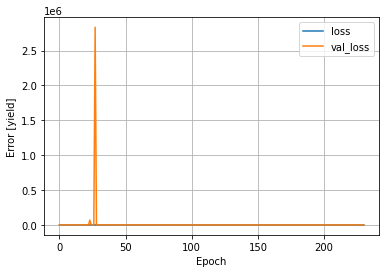

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 50])
  plt.xlabel('Epoch')
  plt.ylabel('Error [yield]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
#plot_loss(history)

In [ ]:
hist = pd.DataFrame(history.history)
print(hist)
hist['epoch'] = history.epoch
hist.tail()

            loss  ...  val_root_mean_squared_error
0    1052.733765  ...                    10.020949
1      94.676491  ...                    10.231114
2      64.575912  ...                    15.817650
3      60.849834  ...                    12.858349
4      55.985741  ...                    12.304854
..           ...  ...                          ...
226     8.088525  ...                     4.373639
227     7.951870  ...                     4.133767
228     8.476963  ...                     4.563211
229     7.523019  ...                     4.150638
230     8.033775  ...                     4.367862

[231 rows x 4 columns]


,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error,epoch
226,8.088525,2.844033,19.128716,4.373639,226
227,7.951870,2.819906,17.088026,4.133767,227
228,8.476963,2.911522,20.822899,4.563211,228
229,7.523019,2.742812,17.227797,4.150638,229
230,8.033775,2.834392,19.078215,4.367862,230


In [ ]:
y1=model.predict(test_x)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       10496     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 256)       295168    
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 256)       5